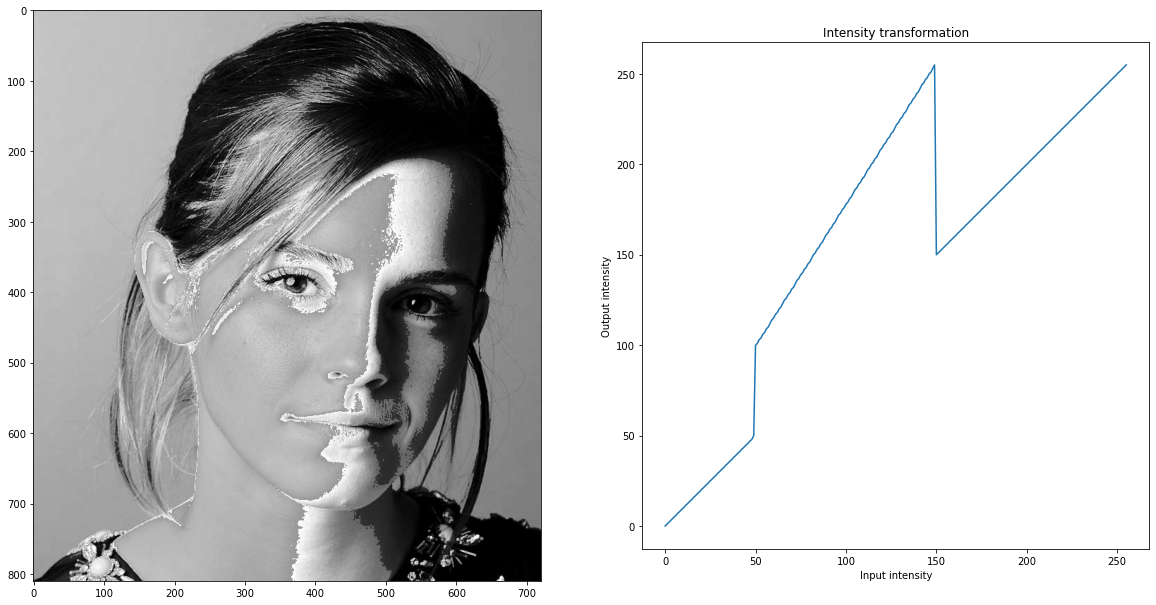

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'emma_gray.jpg') # open image
assert img is not None

# make the transform ranges
range1=np.linspace(0,50,50)
range2=np.linspace(100,255,100)
range3=np.linspace(150,255,106)

# combine all the ranges to a single array
transform=np.concatenate((range1,range2,range3),axis=0).astype(np.uint8)

fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[1].set_title('Intensity transformation')
ax[1].set_xlabel('Input intensity')
ax[1].set_ylabel('Output intensity')
assert len(transform)==256

# perform the intensity transformation on the image
img_new=cv.LUT(img,transform)
ax[0].imshow(cv.cvtColor(img_new,cv.COLOR_BGR2RGB))

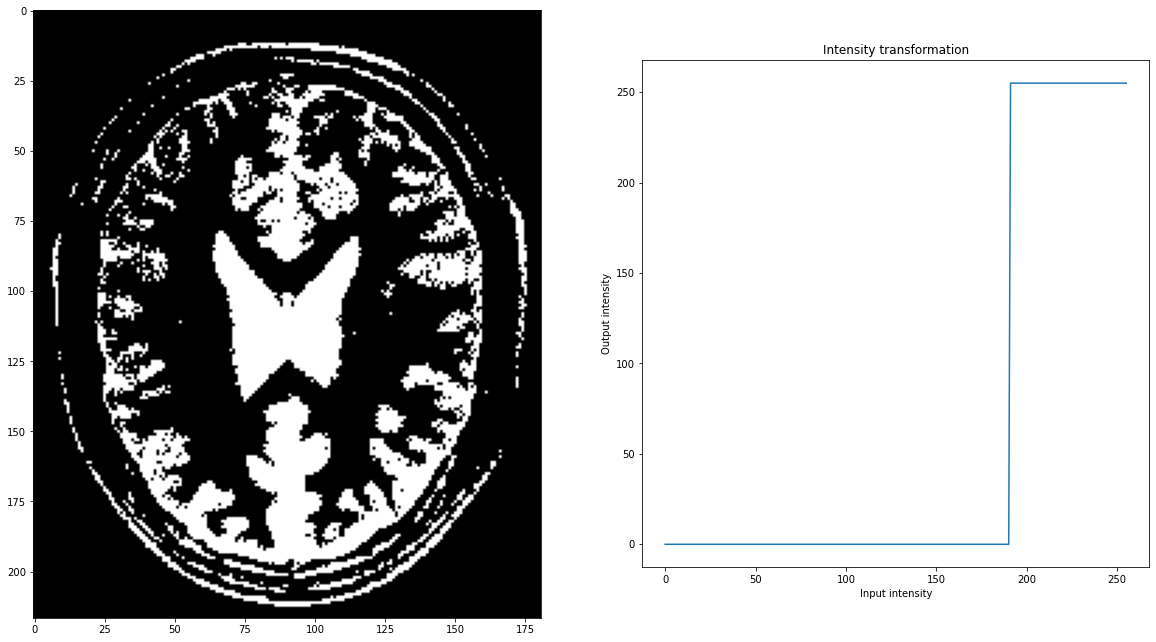

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'brain_proton_density_slice.png') # open image
assert img is not None

# make the transform ranges

range1=np.linspace(0,0,191)
range2=np.linspace(255,255,65)

# combine all the ranges to a single array
transform=np.concatenate((range1,range2),axis=0).astype(np.uint8)
#transform=np.linspace(255,0,256).astype(np.uint8)
fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[1].set_title('Intensity transformation')
ax[1].set_xlabel('Input intensity')
ax[1].set_ylabel('Output intensity')
assert len(transform)==256

# perform the intensity transformation on the image
img_new=cv.LUT(img,transform)
ax[0].imshow(cv.cvtColor(img_new,cv.COLOR_BGR2RGB))

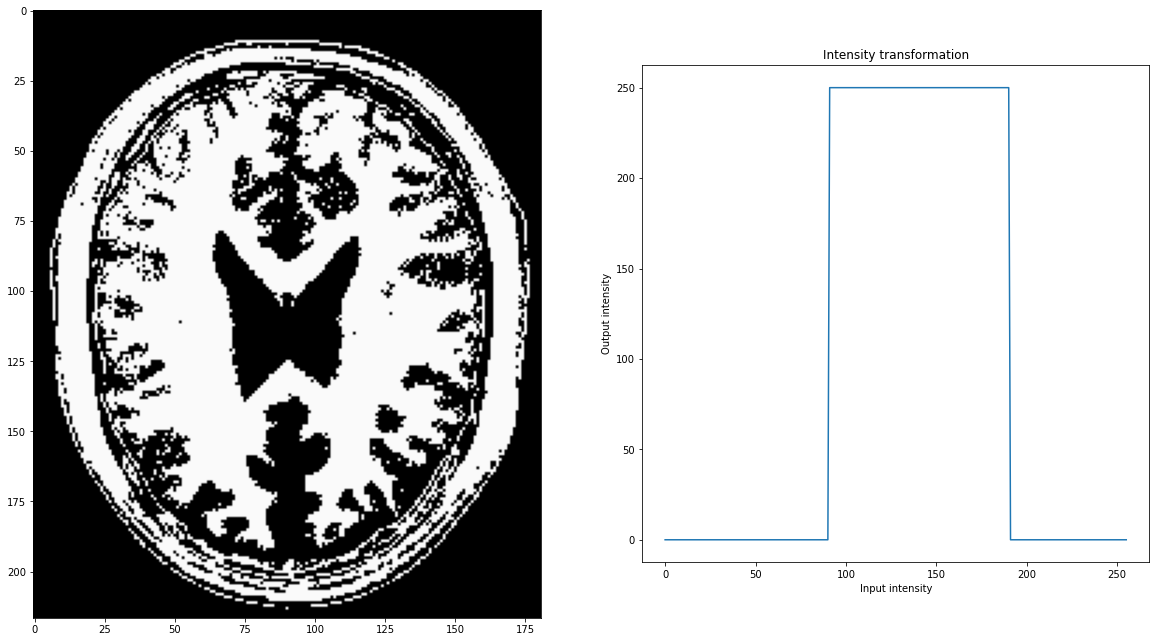

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'brain_proton_density_slice.png') # open image
assert img is not None

# make the transform ranges
range1=np.linspace(0,0,91)
range2=np.linspace(250,250,100)
range3=np.linspace(0,0,65)

# combine all the ranges to a single array
transform=np.concatenate((range1,range2,range3),axis=0).astype(np.uint8)

fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[1].set_title('Intensity transformation')
ax[1].set_xlabel('Input intensity')
ax[1].set_ylabel('Output intensity')
assert len(transform)==256

# perform the intensity transformation on the image
img_new=cv.LUT(img,transform)
ax[0].imshow(cv.cvtColor(img_new,cv.COLOR_BGR2RGB))

In [8]:
'''import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'highlights_and_shadows.jpg') # open image
assert img is not None

lab_img=cv.cvtColor(img,cv.COLOR_BGR2LAB)
gamma=0.6
transform=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
l_img=cv.LUT(lab_img[:,:,0],transform)
new=img.copy()
new[:,:,0]=l_img
new[:,:,1]=lab_img[:,:,1]
new[:,:,2]=lab_img[:,:,2]

fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(cv.cvtColor(lab_img,cv.COLOR_LAB2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(new,cv.COLOR_LAB2RGB))
ax[1].set_title('Corrected Image (Gamma - 0.6)')'''

"import numpy as np\nimport cv2 as cv\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nimg=cv.imread(r'highlights_and_shadows.jpg') # open image\nassert img is not None\n\nlab_img=cv.cvtColor(img,cv.COLOR_BGR2LAB)\ngamma=0.6\ntransform=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)\nl_img=cv.LUT(lab_img[:,:,0],transform)\nnew=img.copy()\nnew[:,:,0]=l_img\nnew[:,:,1]=lab_img[:,:,1]\nnew[:,:,2]=lab_img[:,:,2]\n\nfig,ax=plt.subplots(1,2,figsize=(20,20))\nax[0].imshow(cv.cvtColor(lab_img,cv.COLOR_LAB2RGB))\nax[0].set_title('Original Image')\nax[1].imshow(cv.cvtColor(new,cv.COLOR_LAB2RGB))\nax[1].set_title('Corrected Image (Gamma - 0.6)')"

Text(0.5, 1.0, 'Histogram of Corrected Image (Gamma - 0.4)')

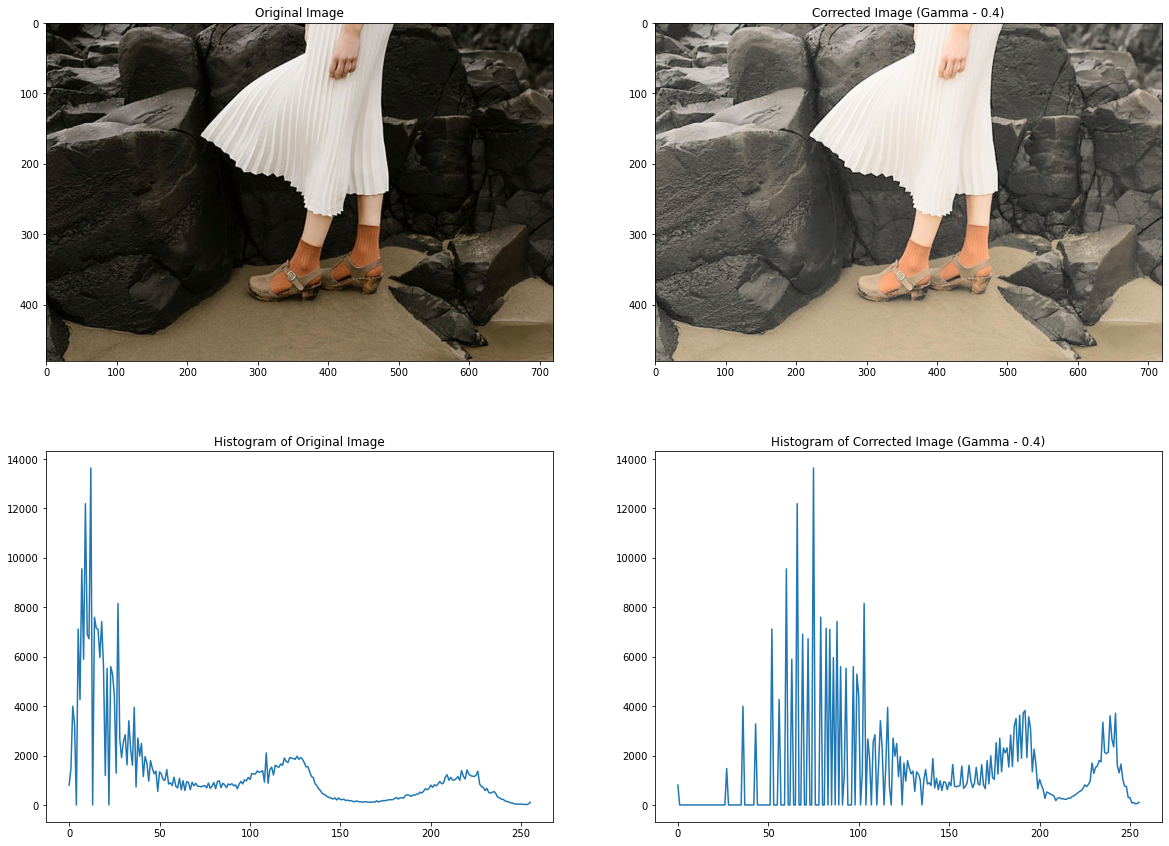

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'highlights_and_shadows.jpg') # open image
assert img is not None

lab_img=cv.cvtColor(img,cv.COLOR_BGR2LAB)
gamma=0.4
transform=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
L,a,b=cv.split(lab_img)
l_img=cv.LUT(L,transform)
new_img=img.copy()
new_img[:,:,0]=l_img
new_img[:,:,1]=lab_img[:,:,1]
new_img[:,:,2]=lab_img[:,:,2]

fig,ax=plt.subplots(2,2,figsize=(20,15))
ax[0][0].imshow(cv.cvtColor(lab_img,cv.COLOR_LAB2RGB))
ax[0][0].set_title('Original Image')
ax[0][1].imshow(cv.cvtColor(new_img,cv.COLOR_LAB2RGB))
ax[0][1].set_title('Corrected Image (Gamma - {})'.format(gamma))

hist_lab_img=cv.calcHist([lab_img],[0],None,[256],[0,256])
hist_new_img=cv.calcHist([new_img],[0],None,[256],[0,256])
ax[1][0].plot(hist_lab_img)
ax[1][0].set_title('Histogram of Original Image')
ax[1][1].plot(hist_new_img)
ax[1][1].set_title('Histogram of Corrected Image (Gamma - {})'.format(gamma))

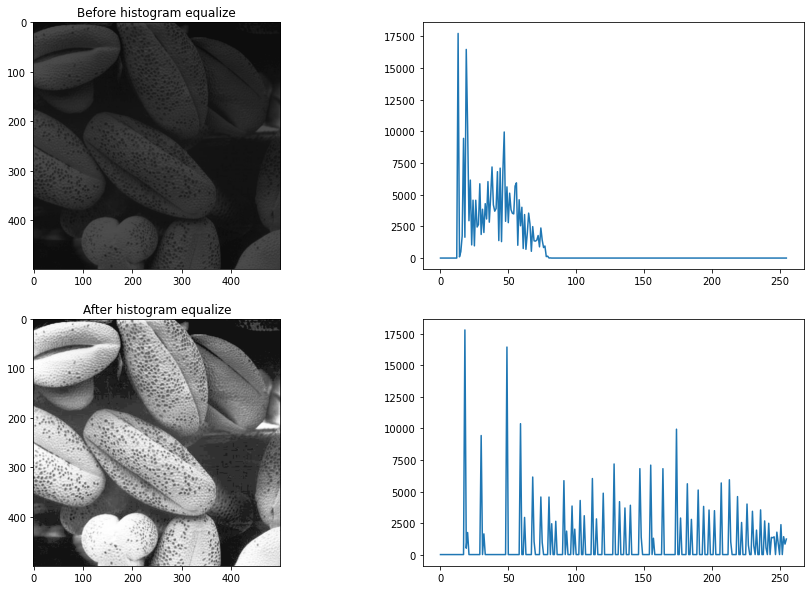

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE) # open image
assert img is not None

intensity_nk=np.zeros((256,1))
L=256
for k in range(L):
    pk=0
    for row in img:
        pk+=np.count_nonzero(row == k)
    intensity_nk[k]=[pk]
    
equalizer_nk=intensity_nk.copy()
MN=len(img)*len(img[0])

'''cum_prob=0
for i in range(len(equalizer_nk)):
    cum_prob+=equalizer_nk[i][0]/MN'''

count=0
cum_sum=0
while count<len(equalizer_nk):
    cum_sum+=equalizer_nk[count][0]
    equalizer_nk[count][0]=int(round(cum_sum*(L-1)/MN))
    count+=1
    
img_new=img.copy()
for m in range(len(img_new)):
    for n in range(len(img_new[m])):
        img_new[m][n]=equalizer_nk[img_new[m][n]][0]

equalizer_hist=np.zeros((256,1))
for k in range(L):
    pk=0
    for row in img_new:
        pk+=np.count_nonzero(row == k)
    equalizer_hist[k]=[pk]
    
fig,ax=plt.subplots(2,2,figsize=(15,10))

ax[0][0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0][0].set_title('Before histogram equalize')
ax[0][1].plot(intensity_nk)

ax[1][0].imshow(cv.cvtColor(img_new, cv.COLOR_BGR2RGB))
ax[1][0].set_title('After histogram equalize')
ax[1][1].plot(equalizer_hist)

In [7]:
np.rint([[[5.2,23.7,8.56]]])

array([[[ 5., 24.,  9.]]])

Nearest-neighbor Interpolation
Bilinear Interpolation


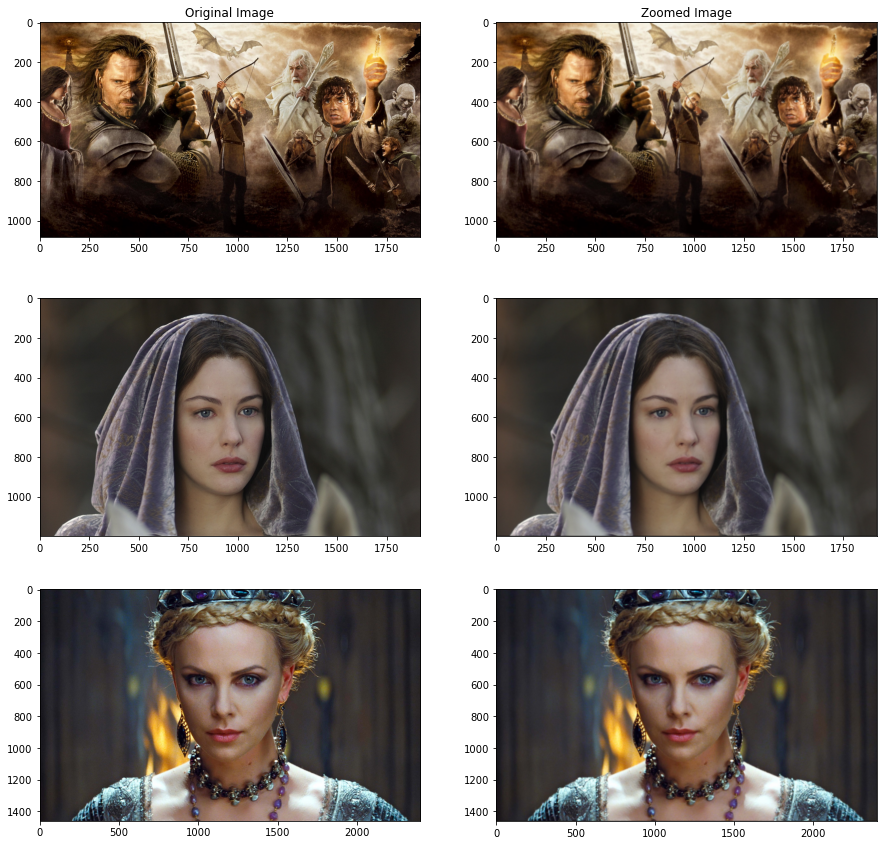

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
%matplotlib inline

def zoom(img,s,method):
    rows_zoomed=img.shape[0]*s
    cols_zoomed=img.shape[1]*s
    if method=='nn':
        img_zoomed=np.zeros((rows_zoomed,cols_zoomed,3),dtype=img.dtype)
        for r in range(rows_zoomed-1):
            for c in range(cols_zoomed-1):
                mod_r=int(round(r/s))
                mod_c=int(round(c/s))
                if mod_r>=img.shape[0]:
                    mod_r=img.shape[0]-1
                if mod_c>=img.shape[1]:
                    mod_c=img.shape[1]-1
                img_zoomed[r][c]=img[mod_r][mod_c]
        return img_zoomed
    
    else:
        img_zoomed=np.zeros((rows_zoomed,cols_zoomed,3),dtype=img.dtype)
        for r in range(rows_zoomed-1):
            for c in range(cols_zoomed-1):
                mod_r=r/s
                mod_c=c/s
                left_top,left_bottom=[math.floor(mod_r),math.floor(mod_c)],[math.ceil(mod_r),math.floor(mod_c)]
                right_top,right_bottom=[math.floor(mod_r),math.ceil(mod_c)],[math.ceil(mod_r),math.ceil(mod_c)]
                if left_bottom[0]>=img.shape[0]:
                    left_bottom[0]=img.shape[0]-1
                    right_bottom[0]=img.shape[0]-1
                if right_top[1]>=img.shape[1]:
                    right_top[1]=img.shape[1]-1
                    right_bottom[1]=img.shape[1]-1

                vertical_ratio=mod_r-math.floor(mod_r)
                horiz_ratio=mod_c-math.floor(mod_c)
                new_left=img[left_top[0]][left_top[1]]*(1-vertical_ratio)+img[left_bottom[0]][left_bottom[1]]*vertical_ratio
                new_right=img[right_top[0]][right_top[1]]*(1-vertical_ratio)+img[right_bottom[0]][right_bottom[1]]*vertical_ratio
                
                img_zoomed[r][c]=np.rint(new_left*(1-horiz_ratio)+new_right*horiz_ratio)
                
        return img_zoomed
                

img1=cv.imread(r'a1q5images/im01small.png',cv.COLOR_BGR2RGB)# open image
assert img1 is not None
img2=cv.imread(r'a1q5images/im02small.png',cv.COLOR_BGR2RGB) # open image
assert img2 is not None
img3=cv.imread(r'a1q5images/im03small.png',cv.COLOR_BGR2RGB) # open image
assert img3 is not None

img1_org=cv.imread(r'a1q5images/im01.png',cv.COLOR_BGR2RGB) # open image
assert img1_org is not None
img2_org=cv.imread(r'a1q5images/im02.png',cv.COLOR_BGR2RGB) # open image
assert img2_org is not None
img3_org=cv.imread(r'a1q5images/im03.png',cv.COLOR_BGR2RGB) # open image
assert img3_org is not None

img1_zoomed_nn=zoom(img1,4,'nn')
img2_zoomed_nn=zoom(img2,4,'nn')
img3_zoomed_nn=zoom(img3,4,'nn')

img1_zoomed_bl=zoom(img1,4,'bl')
img2_zoomed_bl=zoom(img2,4,'bl')
img3_zoomed_bl=zoom(img3,4,'bl')

print('Nearest-neighbor Interpolation')
'''fig,ax=plt.subplots(3,2,figsize=(15,15))
ax[0][0].imshow(cv.cvtColor(img1_org,cv.COLOR_BGR2RGB))
ax[0][0].set_title('Original Image')
ax[0][1].imshow(cv.cvtColor(img1_zoomed_nn,cv.COLOR_BGR2RGB))
ax[0][1].set_title('Zoomed Image')
ax[1][0].imshow(cv.cvtColor(img2_org,cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(img2_zoomed_nn,cv.COLOR_BGR2RGB))
ax[2][0].imshow(cv.cvtColor(img3_org,cv.COLOR_BGR2RGB))
ax[2][1].imshow(cv.cvtColor(img3_zoomed_nn,cv.COLOR_BGR2RGB))'''

print('Bilinear Interpolation')
fig,ax=plt.subplots(3,2,figsize=(15,15))
ax[0][0].imshow(cv.cvtColor(img1_org,cv.COLOR_BGR2RGB))
ax[0][0].set_title('Original Image')
ax[0][1].imshow(cv.cvtColor(img1_zoomed_bl,cv.COLOR_BGR2RGB))
ax[0][1].set_title('Zoomed Image')
ax[1][0].imshow(cv.cvtColor(img2_org,cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(img2_zoomed_bl,cv.COLOR_BGR2RGB))
ax[2][0].imshow(cv.cvtColor(img3_org,cv.COLOR_BGR2RGB))
ax[2][1].imshow(cv.cvtColor(img3_zoomed_bl,cv.COLOR_BGR2RGB))